In [6]:
%matplotlib inline

import os

import numpy
import pandas
import librosa
import scipy.signal

import librosa.display
import matplotlib
from matplotlib import pyplot as plt


In [22]:

def load_samples(directory, sr=48000):
    
    data = []
    
    for filename in os.listdir(directory):
        path = os.path.join(directory, filename)
        audio, sr = librosa.load(path, sr=sr)
    
        data.append({
            'path': path,
            'filename': filename,
            'audio': audio,
        })
    df = pandas.DataFrame.from_records(data)
    return df


samplerate = 48000
samples = load_samples('./data/drumsamples', sr=samplerate)
samples

,path,filename,audio
0,./data/drumsamples/331589__j_zealous__kick-jze...,331589__j_zealous__kick-jzealous-hard-club.aiff,"[0.000620265, 0.05115541, 0.045516394, -0.0934..."
1,./data/drumsamples/410149__screamstudio__kick-...,410149__screamstudio__kick-drum.wav,"[0.006504277, 0.048827853, 0.061693072, 0.0517..."
2,./data/drumsamples/207956__altemark__cymbal.wav,207956__altemark__cymbal.wav,"[0.06790067, 0.0578044, 0.0067414767, -0.01181..."
3,./data/drumsamples/248142__dpren__fat-kick.aiff,248142__dpren__fat-kick.aiff,"[0.0026590228, 0.0120906085, 0.012507772, 0.00..."
4,./data/drumsamples/264601__veiler__kick-swedis...,264601__veiler__kick-swedish.wav,"[-0.6834043, -0.7634248, -0.6569913, -0.817734..."
5,./data/drumsamples/72985__zgump__kick-pack-030...,72985__zgump__kick-pack-0303.wav,"[-0.0019808146, 0.00036242127, 0.002540194, -0..."
6,./data/drumsamples/587935__strangehorizon__cym...,587935__strangehorizon__cymbal_ride.wav,"[-0.00095111196, -0.0010448174, -0.001013998, ..."
7,./data/drumsamples/121097__thirsk__cymbal.wav,121097__thirsk__cymbal.wav,"[0.0021565661, -0.004147167, 0.0011521976, 0.0..."
8,./data/drumsamples/154718__mistorcaveman__cymb...,154718__mistorcaveman__cymbal_9_1-2.aiff,"[0.0001373291, 0.00010681152, 0.00021362305, 0..."
9,./data/drumsamples/171484__xicecoffeex__savann...,171484__xicecoffeex__savannah-kick.wav,"[-1.1267019e-07, 3.898419e-08, -2.1603306e-07,..."


In [80]:

def spectrum_welch(audio, sr, n_fft, window='hann'):
    """Method 2: Use Welch method. Uses overlapped complex spectrum"""
    freqs, power = scipy.signal.welch(audio, fs=sr, nfft=n_fft, window=window,
        scaling="spectrum", average='median')
    db = librosa.power_to_db(power, ref=0.0, top_db=2*120)
    return pandas.Series(db, index=freqs)


# clustering with custom distance function
# https://stackoverflow.com/questions/33721996/how-to-specify-a-distance-function-for-clustering
# https://gist.github.com/codehacken/8b9316e025beeabb082dda4d0654a6fa

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wasserstein_distance.html

ss = [ s for idx, s in samples['audio'].apply(spectrum_welch, sr=samplerate, n_fft=512*16*4).iterrows() ]
samples['spectrum'] = ss
samples.loc[samples['filename'].str.contains('kick'), 'class'] = 'kick'
samples.loc[samples['filename'].str.contains('cymbal'), 'class'] = 'cymbal'
samples = samples.dropna(subset='class')
samples

,path,filename,audio,spectrum,class,third_oct_spectrum,normalized_third_oct_spectrum
0,./data/drumsamples/331589__j_zealous__kick-jze...,331589__j_zealous__kick-jzealous-hard-club.aiff,"[0.000620265, 0.05115541, 0.045516394, -0.0934...",0.000000 -0.000008 1.464844 -0.000...,kick,center 12.5 -0.000008 15.7 -0.000008...,center 12.5 0.0 15.7 0.0 19.8 ...
1,./data/drumsamples/410149__screamstudio__kick-...,410149__screamstudio__kick-drum.wav,"[0.006504277, 0.048827853, 0.061693072, 0.0517...",0.000000 -0.000008 1.464844 -0.000...,kick,center 12.5 -0.000008 15.7 -0.000008...,center 12.5 0.0 15.7 0.0 19.8 ...
2,./data/drumsamples/207956__altemark__cymbal.wav,207956__altemark__cymbal.wav,"[0.06790067, 0.0578044, 0.0067414767, -0.01181...",0.000000 21.435936 1.464844 24.4...,cymbal,center 12.5 25.539684 15.7 26.0817...,center 12.5 -0.448713 15.7 0.0933...
3,./data/drumsamples/248142__dpren__fat-kick.aiff,248142__dpren__fat-kick.aiff,"[0.0026590228, 0.0120906085, 0.012507772, 0.00...",0.000000 -0.000008 1.464844 -0.000...,kick,center 12.5 -0.000008 15.7 -0.000008...,center 12.5 0.0 15.7 0.0 19.8 ...
4,./data/drumsamples/264601__veiler__kick-swedis...,264601__veiler__kick-swedish.wav,"[-0.6834043, -0.7634248, -0.6569913, -0.817734...",0.000000 48.350185 1.464844 51.3...,kick,center 12.5 52.173897 15.7 52.2175...,center 12.5 21.276997 15.7 21.3206...
5,./data/drumsamples/72985__zgump__kick-pack-030...,72985__zgump__kick-pack-0303.wav,"[-0.0019808146, 0.00036242127, 0.002540194, -0...",0.000000 54.405617 1.464844 57.4...,kick,center 12.5 59.796261 15.7 60.2451...,center 12.5 37.671551 15.7 38.1203...
6,./data/drumsamples/587935__strangehorizon__cym...,587935__strangehorizon__cymbal_ride.wav,"[-0.00095111196, -0.0010448174, -0.001013998, ...",0.000000 31.904778 1.464844 34.9...,cymbal,center 12.5 34.913803 15.7 34.9080...,center 12.5 -21.041924 15.7 -21.0476...
7,./data/drumsamples/121097__thirsk__cymbal.wav,121097__thirsk__cymbal.wav,"[0.0021565661, -0.004147167, 0.0011521976, 0.0...",0.000000 13.986938 1.464844 16.9...,cymbal,center 12.5 18.152802 15.7 18.2975...,center 12.5 -3.656460 15.7 -3.511709...
8,./data/drumsamples/154718__mistorcaveman__cymb...,154718__mistorcaveman__cymbal_9_1-2.aiff,"[0.0001373291, 0.00010681152, 0.00021362305, 0...",0.000000 36.084332 1.464844 39.0...,cymbal,center 12.5 39.346485 15.7 39.5689...,center 12.5 19.027292 15.7 19.2497...
9,./data/drumsamples/171484__xicecoffeex__savann...,171484__xicecoffeex__savannah-kick.wav,"[-1.1267019e-07, 3.898419e-08, -2.1603306e-07,...",0.000000 18.527969 1.464844 21.8...,kick,center 12.5 22.635735 15.7 23.0665...,center 12.5 22.635742 15.7 23.0665...


In [81]:

def make_octave_bands():
    # NOTE: not entirelay equal to the conventional rounded values (250, 1000, etc)
    bins = 31
    bands = pandas.DataFrame({
        'lower': librosa.cqt_frequencies(bins, fmin=11.2, bins_per_octave=3).round(1),
        'center': librosa.cqt_frequencies(bins, fmin=12.5, bins_per_octave=3).round(1),
        'upper': librosa.cqt_frequencies(bins, fmin=14.1, bins_per_octave=3).round(1),
    }).set_index('center')
    return bands

def third_oct_spectrum(spectrum):
    bands = make_octave_bands()
    
    values = []
    for center, lower, upper in zip(bands.index, bands.lower, bands.upper):
        value = numpy.mean(spectrum.loc[lower:upper])
    
        values.append(value)
        #print(center, value)

    s = pandas.Series(values, index=bands.index, name='db')
    return s
        

samples['third_oct_spectrum'] = [ s for idx, s in samples['spectrum'].apply(third_oct_spectrum).iterrows() ]



In [87]:
def find_nearest(array, value):
    array = numpy.asarray(array)
    idx = (numpy.abs(array - value)).argmin()
    return array[idx]

def normalize_at_frequency(spectrum, freq=1000.0):
    band = find_nearest(spectrum.index, freq)
    val = spectrum.loc[band]

    normalized = spectrum - val
    return normalized
    
samples['normalized_third_oct_spectrum'] = [ s for idx, s in samples['third_oct_spectrum'].apply(normalize_at_frequency, freq=250).iterrows() ]


/tmp/ipykernel_7638/1603875228.py:12: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, axis='x')


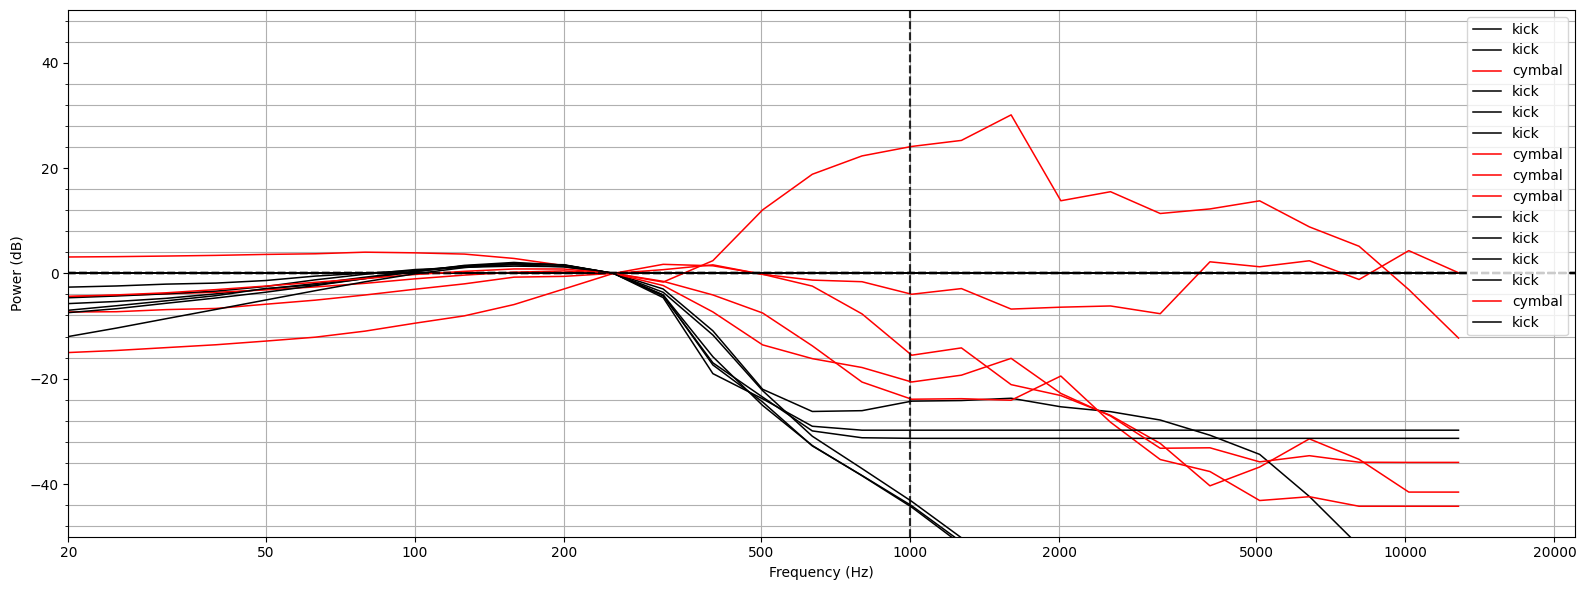

In [89]:

def freq_response_configure_xaxis(ax, fmin=10, fmax=22000):
    import matplotlib.ticker as ticker

    # X axis
    ax.set_xlabel('Frequency (Hz)')
    ax.set(xlim=(fmin, fmax), xscale='log')
    f_major = [20, 50, 100, 200, 500, 1000, 2000, 5000, 10000, 20000]
    ax.xaxis.set_major_locator(ticker.FixedLocator(f_major))
    ax.xaxis.set_major_formatter(ticker.FixedFormatter(f_major))
    ax.xaxis.set_minor_locator(ticker.LogLocator(base=10, numticks=10))
    ax.xaxis.set_minor_formatter(ticker.NullFormatter())   
    ax.grid(b=True, axis='x')

def plot_freq_response(ax, fmin=20.0, fmax=22000, zero=0.0, dbmax=10, dbmin=-20, fref=1.0e3):
    import matplotlib.ticker as ticker
    
    if fref is not None:
        ax.axvline(fref, alpha=0.1, color="black", ls="--")
    if zero is not None:
        ax.axhline(zero, alpha=0.5, color="black", ls="--")

    freq_response_configure_xaxis(ax, fmin=fmin, fmax=fmax)

    # Y axis
    ax.set_ylabel('Power (dB)')
    ax.set(ylim=(dbmin, dbmax))
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(5))
    ax.yaxis.set_minor_formatter(ticker.NullFormatter())
    ax.grid(visible=True, axis='y', which='minor')

fig, ax = plt.subplots(1, figsize=(16, 6))

for idx, sample in samples.iterrows():
    s = sample['normalized_third_oct_spectrum']
    color = 'black'
    c = sample['class']
    if c == 'cymbal':
        color = 'red'
    #print(c, color)
    ax.plot(s.index, s.values, color=color, lw=1.1, label=c)
    plot_freq_response(ax, dbmax=50, dbmin=-50)

ax.legend()
fig.tight_layout()
fig.savefig("spectrum.png")


In [101]:
def spectrum_value(spectrum, freq=1000):
    #print(spectrum)
    band = find_nearest(spectrum.index, freq)
    val = spectrum.loc[band]
    #val = val / numpy.sum(spectrum)
    return val
    

samples['low_end'] = samples['third_oct_spectrum'].apply(spectrum_value, freq=200)
samples['high_end'] = samples['third_oct_spectrum'].apply(spectrum_value, freq=2000)


<AxesSubplot: xlabel='low_end', ylabel='high_end'>

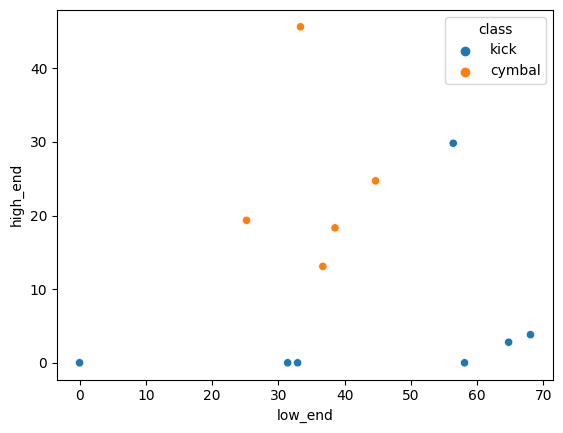

In [102]:
import seaborn

seaborn.scatterplot(data=samples, x='low_end', y='high_end', hue='class')
